In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Data uploading

In [2]:
AIRPORT_ICAO = "ESSA"

RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
RUNWAYS2 = ['01R', '26', '19L']
CLUSTERS = [1,2,3,4,5,6]

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# WIF
rwy_metrics_WIF_vertical_PIs_by_hour_df_list = [] # list of lists

# TIF
rwy_metrics_TIF_vertical_PIs_by_hour_df_list = [] # list of lists

i = 0
for runway in RUNWAYS:
    rwy_metrics_WIF_vertical_PIs_by_hour_df_list.append([])
    rwy_metrics_TIF_vertical_PIs_by_hour_df_list.append([])

    for cluster in CLUSTERS:
        filename = AIRPORT_ICAO + "_metrics_WIF_vertical_PIs_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_WIF_vertical_PIs_by_hour_df_list[i].append(temp_df)

        filename = AIRPORT_ICAO + "_metrics_TIF_vertical_PIs_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_TIF_vertical_PIs_by_hour_df_list[i].append(temp_df)

    i = i+1

In [8]:
CLUSTER_DIR = os.path.join("..", "..")
CLUSTER_DIR = os.path.join(CLUSTER_DIR, "..")
CLUSTER_DIR = os.path.join(CLUSTER_DIR, "Data")
CLUSTER_DIR = os.path.join(CLUSTER_DIR, "Clustering")
filename = "osn_arrival_" + AIRPORT_ICAO + "_TMA_runways_clusters.csv"
full_filename = os.path.join(CLUSTER_DIR, filename)
temp_df = pd.read_csv(full_filename, sep=' ')

for runway in RUNWAYS2:
    runway_df = temp_df[temp_df['runway']==runway]
    number_of_flights = []
    for cluster in CLUSTERS:
        cluster_df = runway_df[runway_df['cluster']==cluster]
        number_of_flights.append(len(cluster_df))
    print(runway)
    print(sum(number_of_flights))
    print(number_of_flights)

01R
23501
[3961, 3108, 9053, 2670, 1910, 2799]
26
31849
[2885, 5821, 3277, 12410, 3950, 3506]
19L
21139
[2687, 1458, 7266, 3378, 3725, 2625]


# Average Time On Levels

## Medians of Average Time On Levels vs WIF

0.36
0.06
0.05
0.28
0.07
0.07
0.04
0.34
0.37
0.55
0.43
0.04
0.45
0.29
0.17
0.69
0.15
0.31
0.01
0.38
0.34
0.34
0.07
0.02
0.51
0.36
0.53
0.49
0.70
0.62
0.25
0.29
0.52
0.31
0.26
0.41


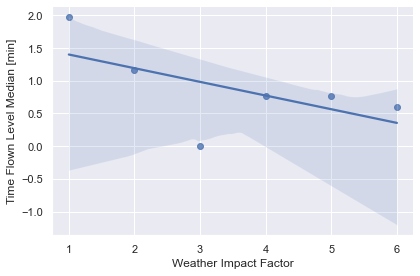

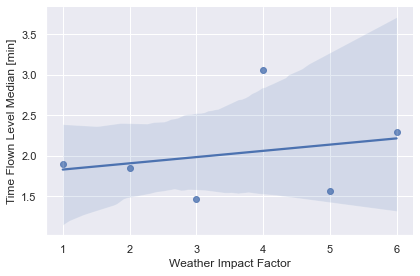

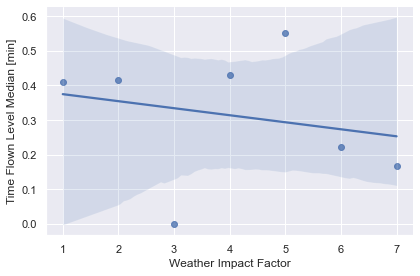

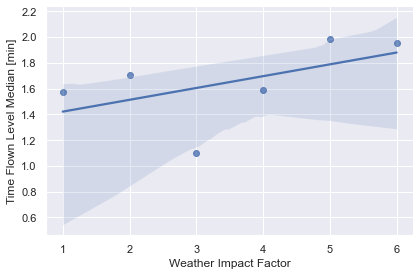

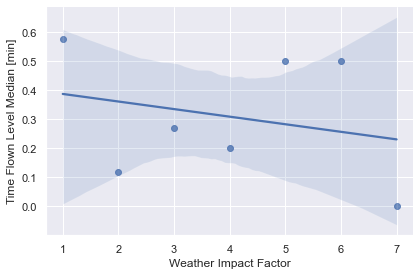

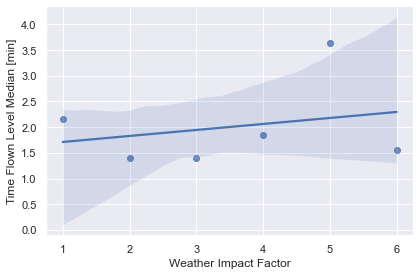

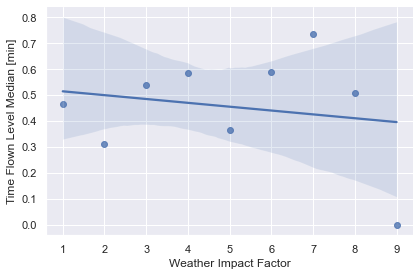

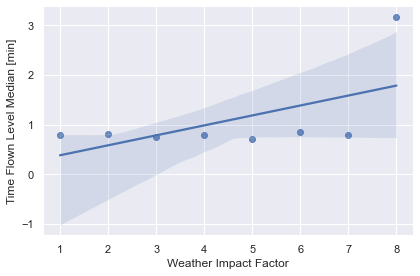

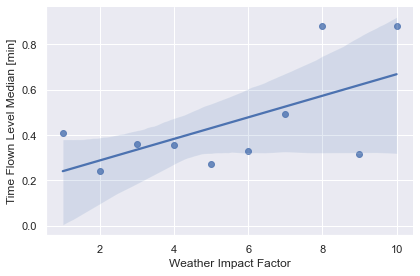

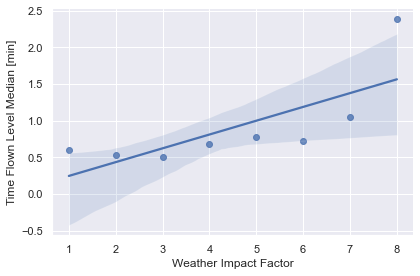

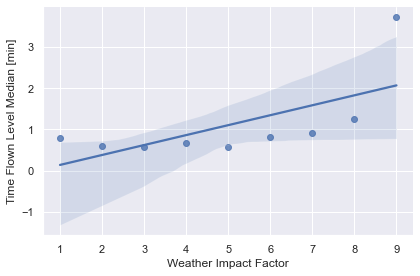

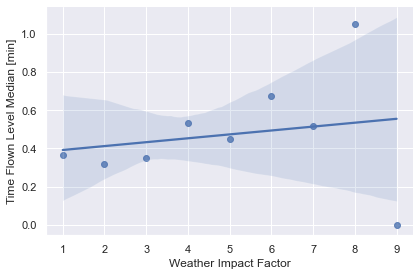

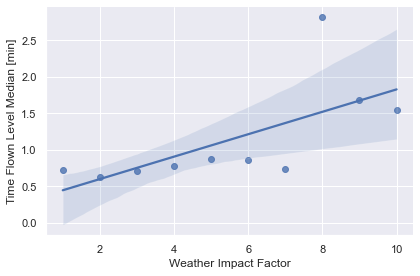

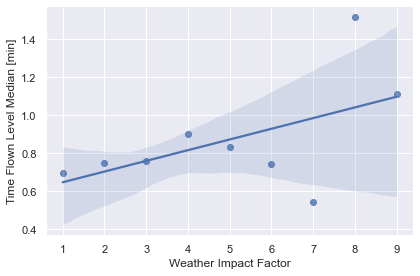

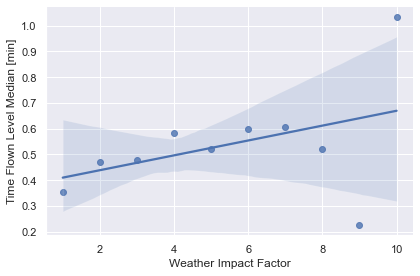

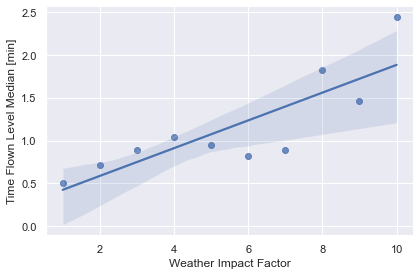

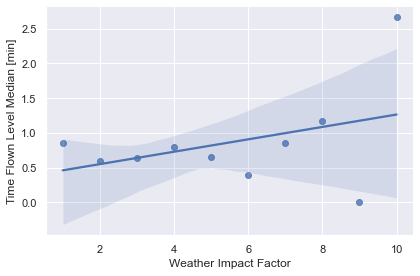

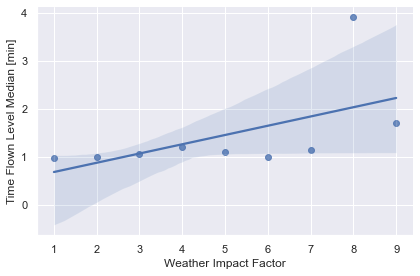

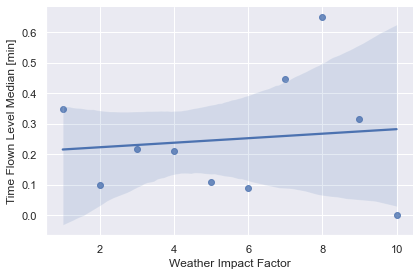

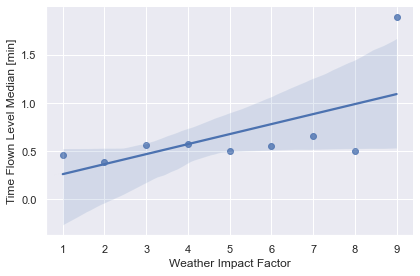

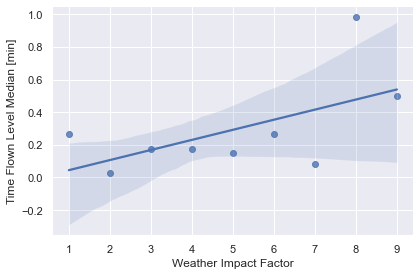

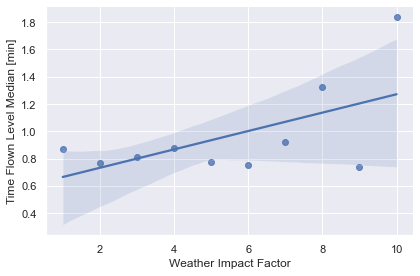

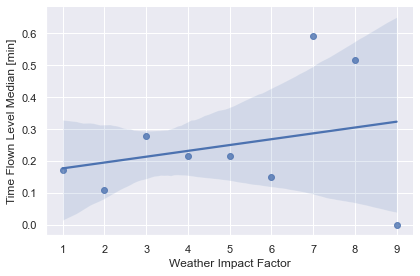

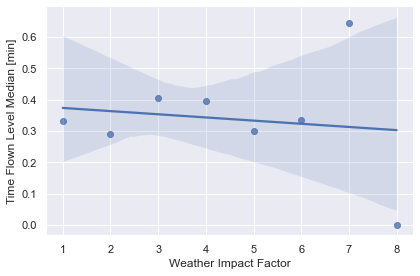

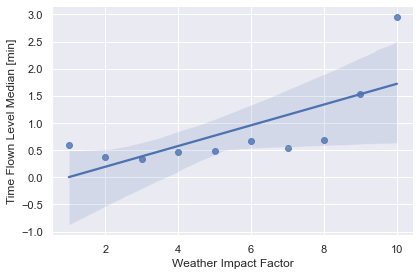

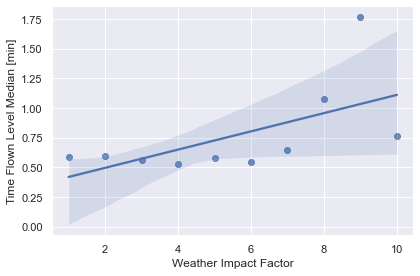

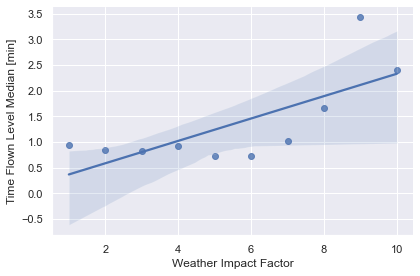

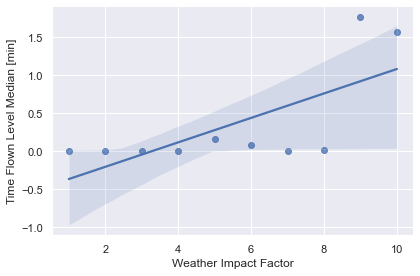

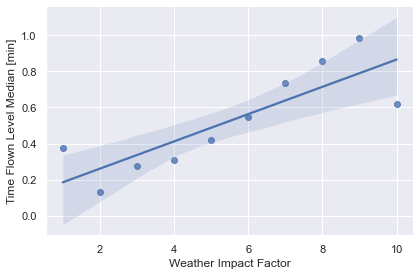

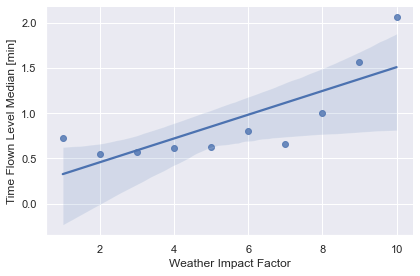

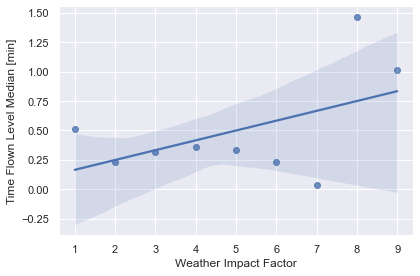

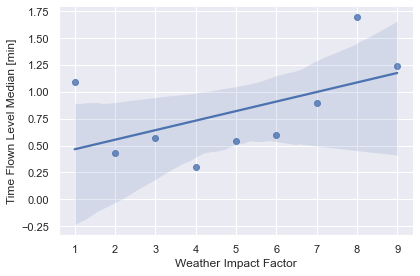

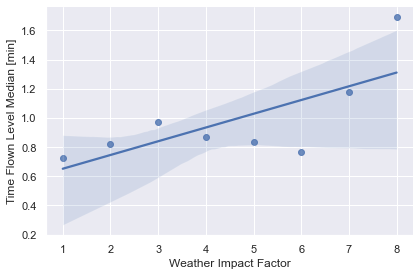

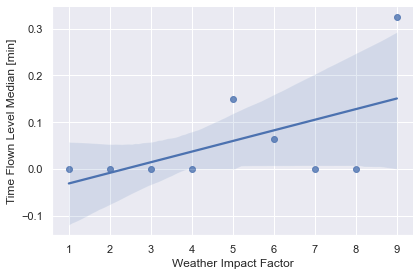

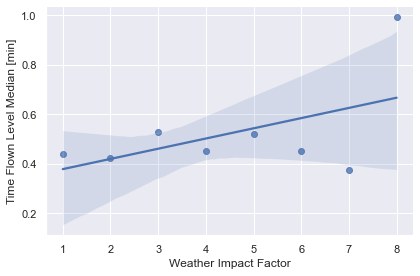

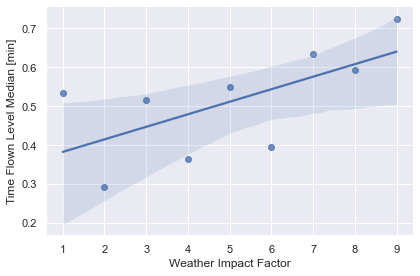

In [4]:
i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_WIF_vertical_PIs_by_hour_df_list[i][cluster-1].copy()

        df = df[df['numberOfFlights']>0]
        #p1 = df["timeOnLevelsMean"].quantile(0.05)
        #p2 = df["timeOnLevelsMean"].quantile(0.95)
        #df = df.loc[(df['timeOnLevelsMean'] > p1) & (df['timeOnLevelsMean'] < p2) ]

        #p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
        #p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
        #df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

        df.set_index(['WIF'], inplace=True)
        df.sort_index(inplace=True)

        #print(df.head())
        median_df = pd.DataFrame(columns=['WIF', 'timeOnLevelsMedian'])

        for idx, group in df.groupby(level='WIF'):
    
            #idx_df = group['timeOnLevelsPercentMean']
            idx_df = group['timeOnLevelsMean']
            #print(len(idx_df))
    
            idx_median = np.median(idx_df)
            median_df = median_df.append({'WIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

        median_df['WIF'] = median_df['WIF'].astype(np.float)
        median_df['timeOnLevelsMedian'] = median_df['timeOnLevelsMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='WIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Weather Impact Factor')
        plt.ylabel('Time Flown Level Median [min]')
        #plt.ylabel('Time Flown Level Median [%]')
        
        #fig_name = "Figures\TimeOnLevelsPercentVsWIF\TimeOnLevelsPercentVsWIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        fig_name = "Figures\TimeOnLevelsVsWIF\TimeOnLevelsVsWIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        plt.savefig(fig_name)

        #statsmodel:
        X_df = median_df[['WIF']]
        y_df = median_df[['timeOnLevelsMedian']]

        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        #print(est2.summary())
        rsquare = est2.rsquared
        #print(f"R-suare is {rsquare:.2f}")
        print(f"{rsquare:.2f}")
        # with outliers - ESGG: 0.57 ESSA: 0.76
        # without outliers - ESGG: 0.93 ESSA: 0.73

## Medians of Average Time On Levels vs TIF

0.02
0.26
0.03
0.01
0.44
0.01
0.72
0.09
0.34
0.02
0.10
0.77
0.90
0.03
0.57
0.17
0.53
0.28
0.58
0.08
0.42
0.71
0.00
0.00
0.25
0.12
0.90
0.49
0.19
0.47
0.08
0.00
0.23
0.85
0.02
0.20


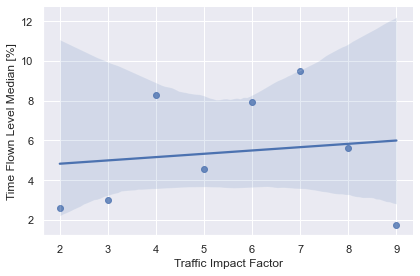

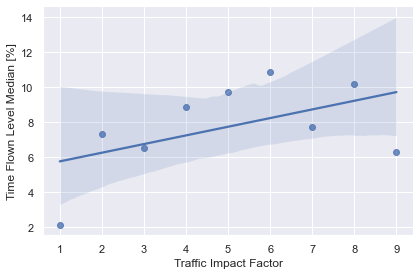

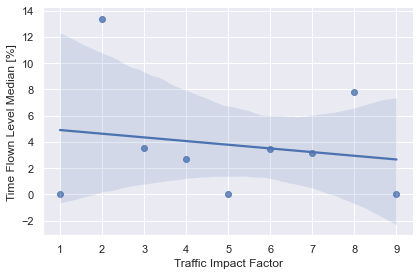

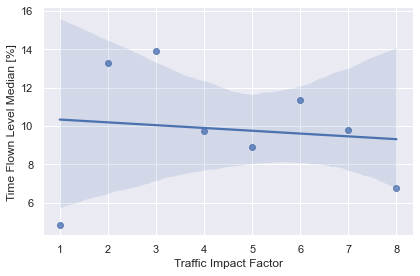

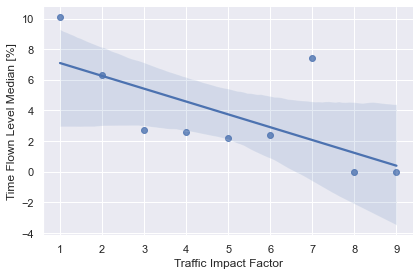

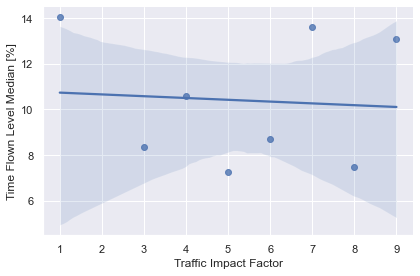

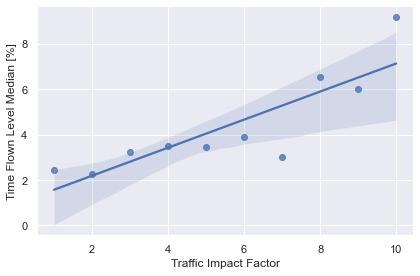

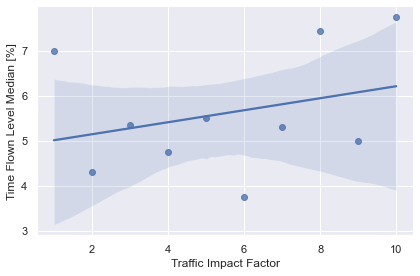

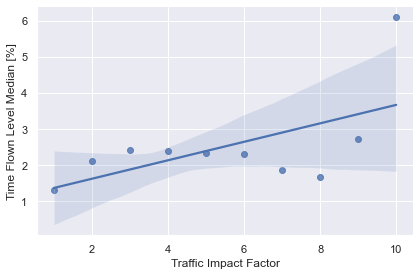

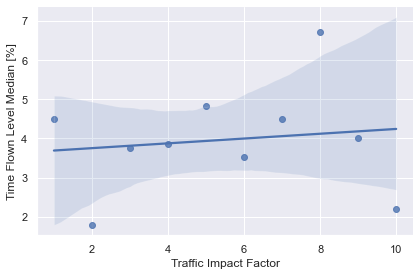

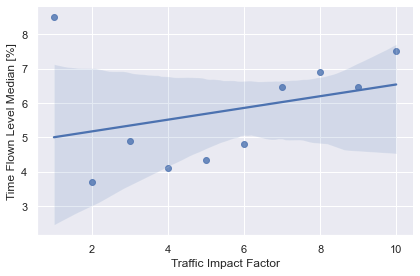

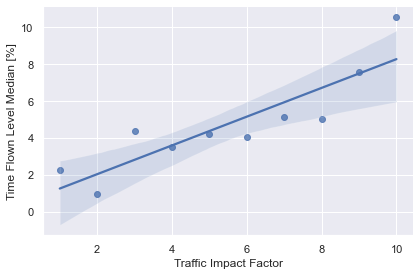

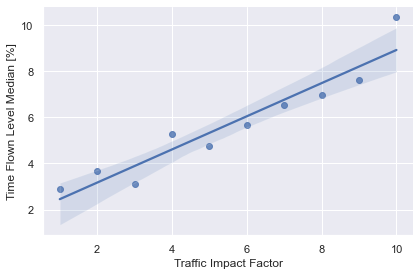

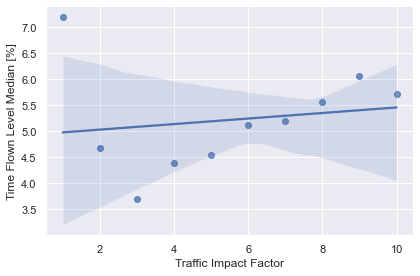

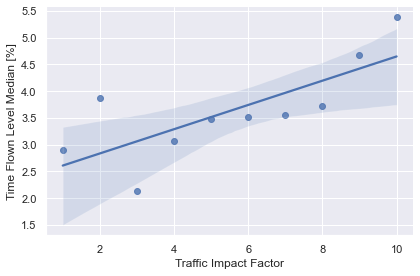

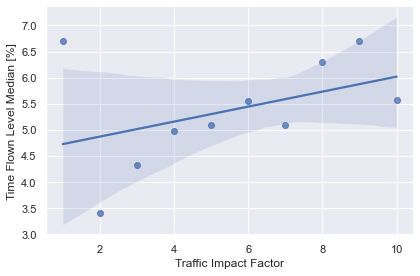

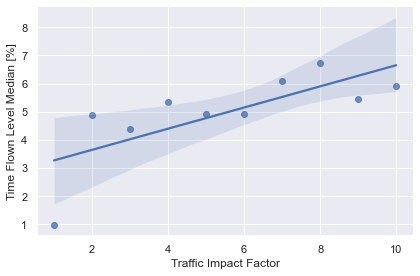

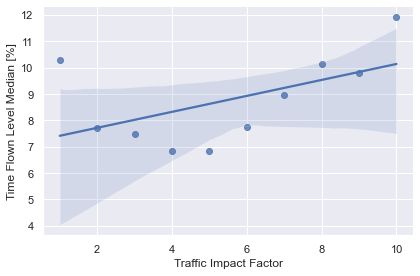

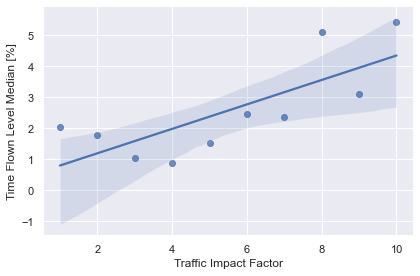

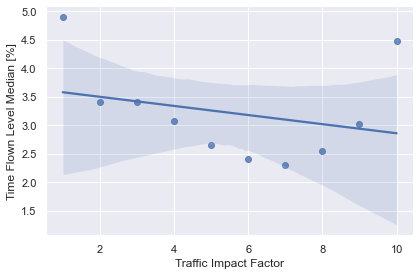

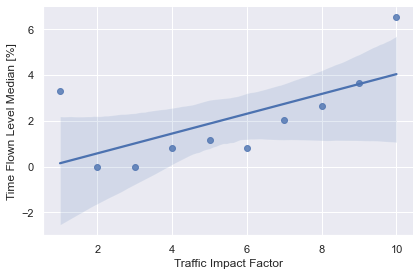

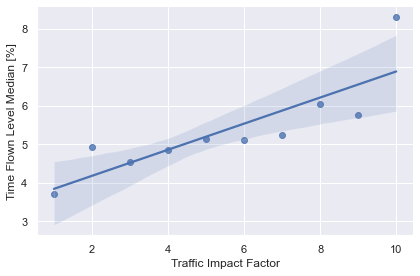

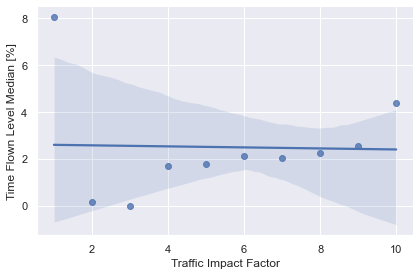

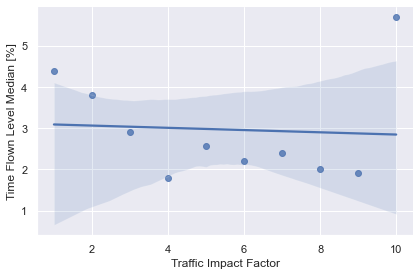

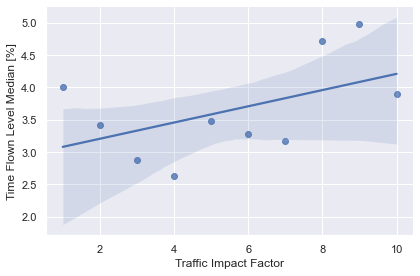

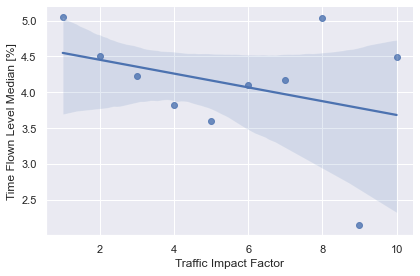

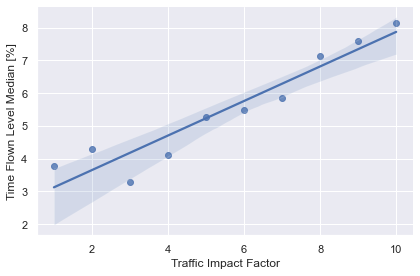

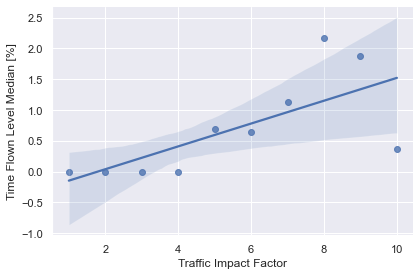

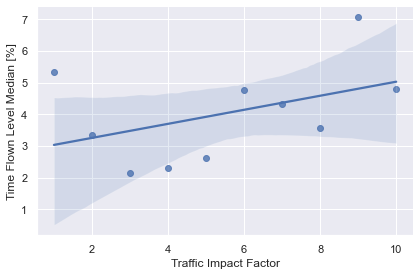

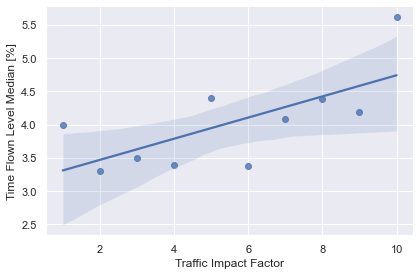

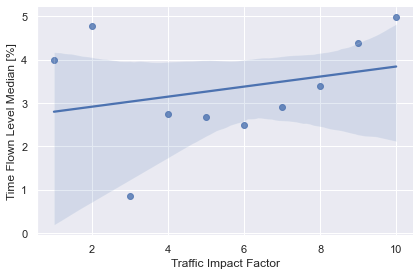

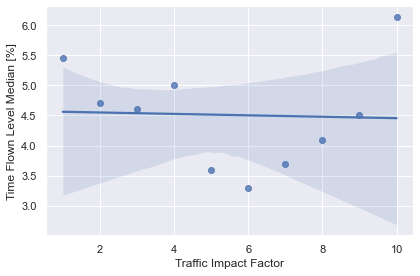

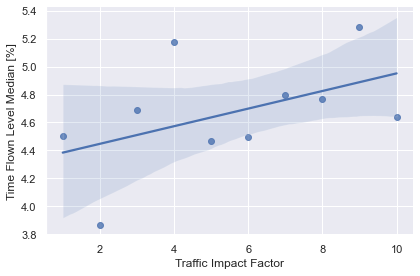

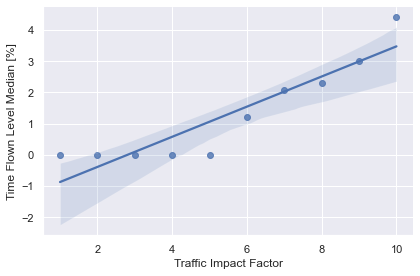

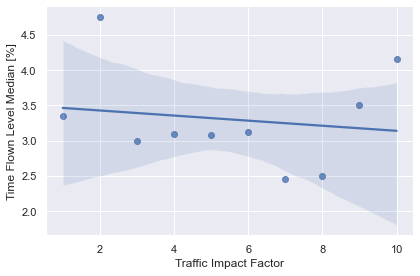

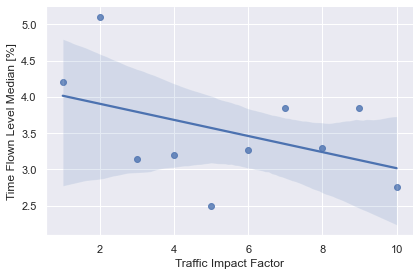

In [5]:
RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_TIF_vertical_PIs_by_hour_df_list[i][cluster-1].copy()
        df = df[df['numberOfFlights']>0]
        #p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
        #p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
        #df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

        df.set_index(['TIF'], inplace=True)
        df.sort_index(inplace=True)

        median_df = pd.DataFrame(columns=['TIF', 'timeOnLevelsMedian'])

        for idx, group in df.groupby(level='TIF'):
    
            idx_df = group['timeOnLevelsPercentMean']

            idx_median = np.median(idx_df)
            median_df = median_df.append({'TIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

        median_df['TIF'] = median_df['TIF'].astype(np.float)
        median_df['timeOnLevelsMedian'] = median_df['timeOnLevelsMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='TIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Traffic Impact Factor')
        plt.ylabel('Time Flown Level Median [%]')
        
        fig_name = "Figures\TimeOnLevelsPercentVsTIF\TimeOnLevelsPercentVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        #fig_name = "Figures\TimeOnLevelsVsTIF\TimeOnLevelsVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"

        plt.savefig(fig_name)

        #statsmodel:
        X_df = median_df[['TIF']]
        y_df = median_df[['timeOnLevelsMedian']]

        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        #print(est2.summary())
        rsquare = est2.rsquared
        #print(f"R-suare is {rsquare:.2f}")
        print(f"{rsquare:.2f}")
        # with outliers - ESGG: 0.13 ESSA: 0.63
        # without outliers - ESGG: 0.01 ESSA: 0.4